In [111]:
import numpy as np
import pandas as pd

In [112]:
df=pd.read_csv("CollegePlacement.csv")

In [113]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [114]:
import seaborn as sns


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [116]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [117]:
df.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [118]:
df['Placement'].value_counts()

Placement
No     8341
Yes    1659
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Placement'>

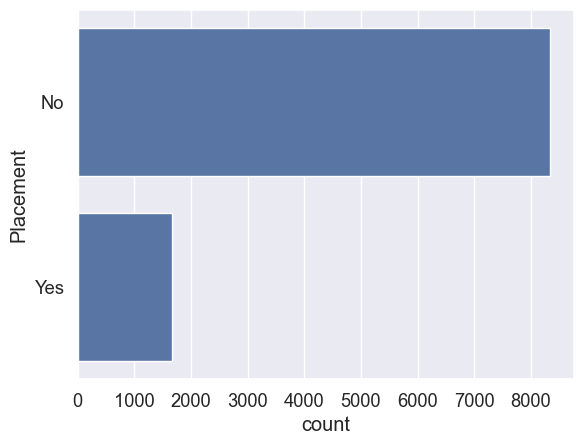

In [119]:
sns.countplot(data=df['Placement'])



<Axes: xlabel='IQ', ylabel='Communication_Skills'>

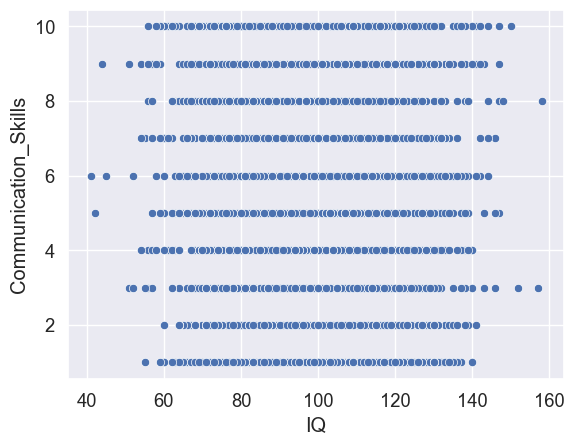

In [120]:
sns.scatterplot(x=df['IQ'],y=df['Communication_Skills'])

<Axes: xlabel='IQ', ylabel='Count'>

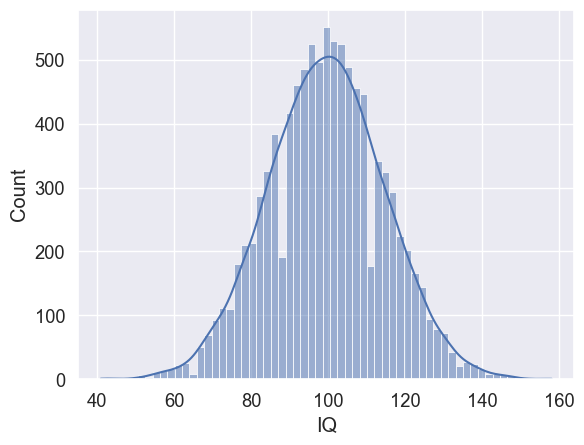

In [121]:
sns.histplot(data=df['IQ'],kde=True)

In [122]:
df['College_ID'].value_counts()

College_ID
CLG0062    133
CLG0027    120
CLG0075    119
CLG0065    119
CLG0023    118
          ... 
CLG0006     83
CLG0060     83
CLG0035     83
CLG0054     79
CLG0042     75
Name: count, Length: 100, dtype: int64

In [123]:
total_per_college = df.groupby('College_ID').size().reset_index(name='total_students')
print(total_per_college)

   College_ID  total_students
0     CLG0001             109
1     CLG0002              86
2     CLG0003              97
3     CLG0004              91
4     CLG0005             112
..        ...             ...
95    CLG0096              99
96    CLG0097             101
97    CLG0098             105
98    CLG0099              89
99    CLG0100              97

[100 rows x 2 columns]


In [124]:
placed_per_college = df[df['Placement'].str.lower() == 'yes'].groupby('College_ID').size().reset_index(name='placed_count')
print(placed_per_college)


   College_ID  placed_count
0     CLG0001            11
1     CLG0002            12
2     CLG0003            17
3     CLG0004            13
4     CLG0005            17
..        ...           ...
95    CLG0096            23
96    CLG0097            17
97    CLG0098            16
98    CLG0099            14
99    CLG0100            17

[100 rows x 2 columns]


In [125]:
total_per_college = df.groupby('College_ID').size().reset_index(name='total_students')

# Merge and calculate placement rate
college_summary = pd.merge(total_per_college, placed_per_college, on='College_ID', how='left').fillna(0)
college_summary['placement_rate'] = (college_summary['placed_count'] / college_summary['total_students']) * 100

print("\nCollege Placement Summary:")
print(college_summary.sort_values(by='placement_rate', ascending=False))


College Placement Summary:
   College_ID  total_students  placed_count  placement_rate
37    CLG0038             106            28       26.415094
41    CLG0042              75            19       25.333333
27    CLG0028              88            22       25.000000
11    CLG0012             110            26       23.636364
83    CLG0084             102            24       23.529412
..        ...             ...           ...             ...
0     CLG0001             109            11       10.091743
70    CLG0071             102            10        9.803922
85    CLG0086             110            10        9.090909
33    CLG0034             112            10        8.928571
77    CLG0078             113            10        8.849558

[100 rows x 4 columns]


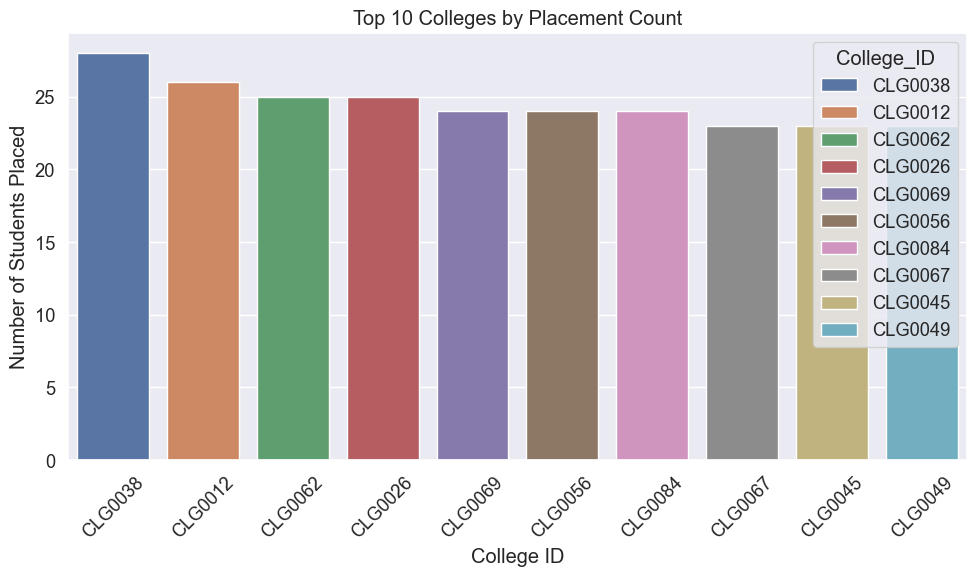

In [126]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid",  font_scale=1.2)

# 1️⃣ Placement Count per College (Top 10)
top_count = college_summary.sort_values(by='placed_count', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='College_ID', y='placed_count', data=top_count, hue='College_ID', legend=True)
plt.title('Top 10 Colleges by Placement Count')
plt.xlabel('College ID')
plt.ylabel('Number of Students Placed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

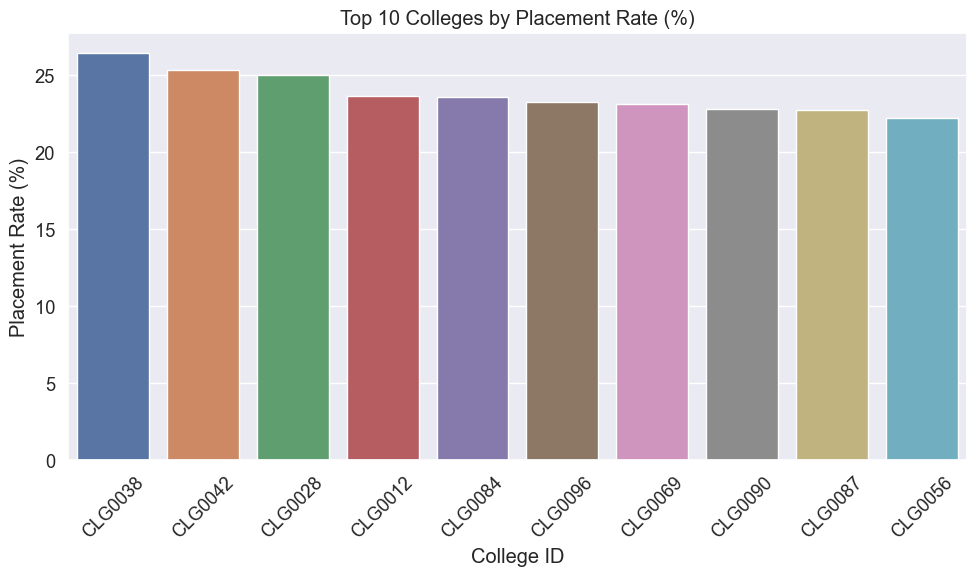

In [127]:
top_rate = college_summary.sort_values(by='placement_rate', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='College_ID', y='placement_rate', data=top_rate, hue='College_ID', legend=False)
plt.title('Top 10 Colleges by Placement Rate (%)')
plt.xlabel('College ID')
plt.ylabel('Placement Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ravul\AppData\Local\Temp\ipykernel_19832\4183765373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Placement', data=df, palette='coolwarm')


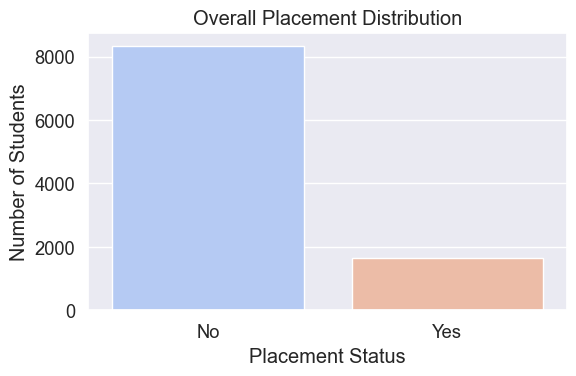

In [128]:
plt.figure(figsize=(6,4))
sns.countplot(x='Placement', data=df, palette='coolwarm')
plt.title('Overall Placement Distribution')
plt.xlabel('Placement Status')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

C:\Users\ravul\AppData\Local\Temp\ipykernel_19832\3000738739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Placement', data=df, palette='coolwarm')


Text(0.5, 1.0, 'Placement Distribution')

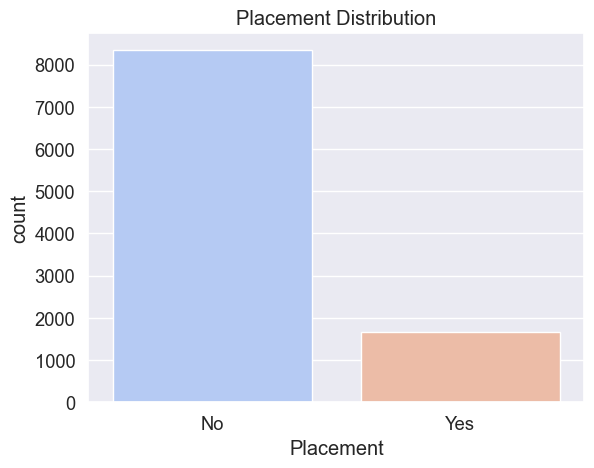

In [129]:
sns.countplot(x='Placement', data=df, palette='coolwarm')
plt.title("Placement Distribution")


Text(0.5, 1.0, 'Placement Rate by College')

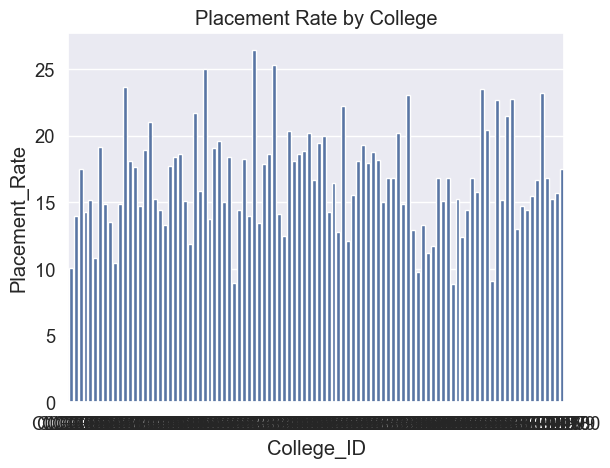

In [130]:
college_summary = (
    df.groupby('College_ID')['Placement']
    .apply(lambda x: (x.str.lower() == 'yes').mean() * 100)
    .reset_index(name='Placement_Rate')
)
sns.barplot(x='College_ID', y='Placement_Rate', data=college_summary)
plt.title("Placement Rate by College")


Text(0.5, 1.0, 'Average CGPA per College')

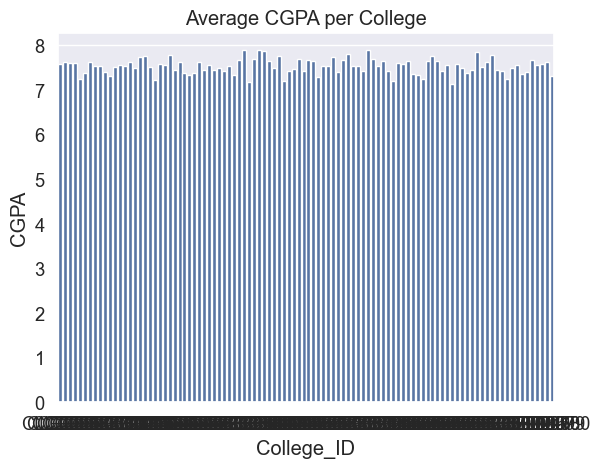

In [131]:
college_stats = df.groupby('College_ID')[['CGPA', 'IQ']].mean().reset_index()
sns.barplot(x='College_ID', y='CGPA', data=college_stats)
plt.title("Average CGPA per College")


C:\Users\ravul\AppData\Local\Temp\ipykernel_19832\182128655.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Placement', y='CGPA', data=df, palette='Set2')


Text(0.5, 1.0, 'CGPA Distribution by Placement Status')

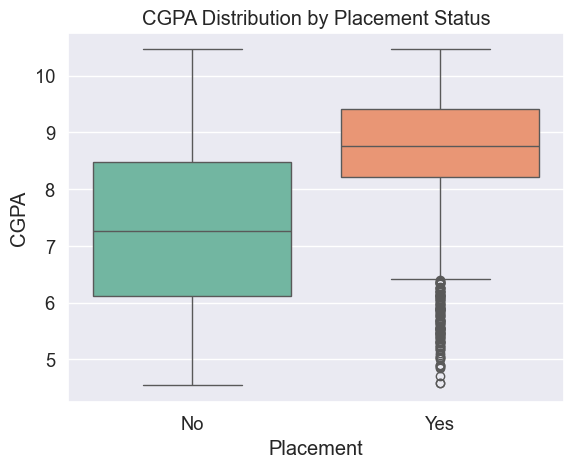

In [132]:
sns.boxplot(x='Placement', y='CGPA', data=df, palette='Set2')
plt.title("CGPA Distribution by Placement Status")


Text(0.5, 1.0, 'Internship Experience vs Placement')

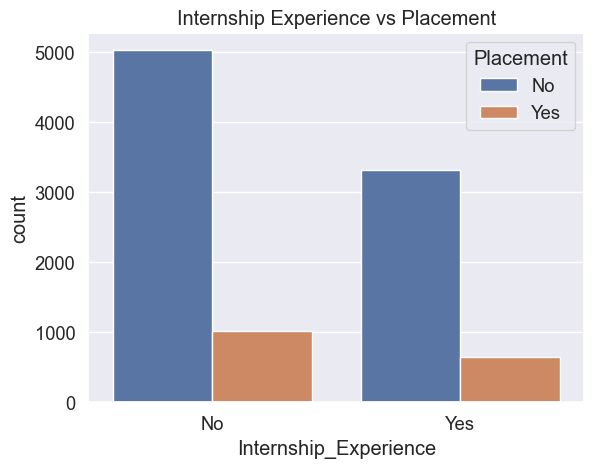

In [133]:
sns.countplot(x='Internship_Experience', hue='Placement', data=df)
plt.title("Internship Experience vs Placement")


Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

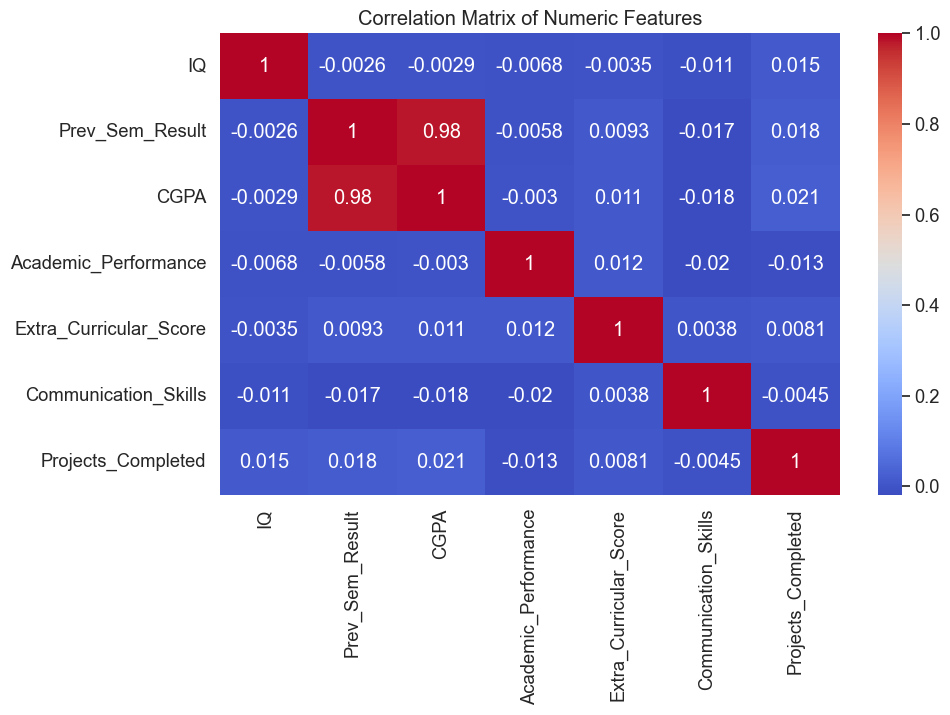

In [134]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")


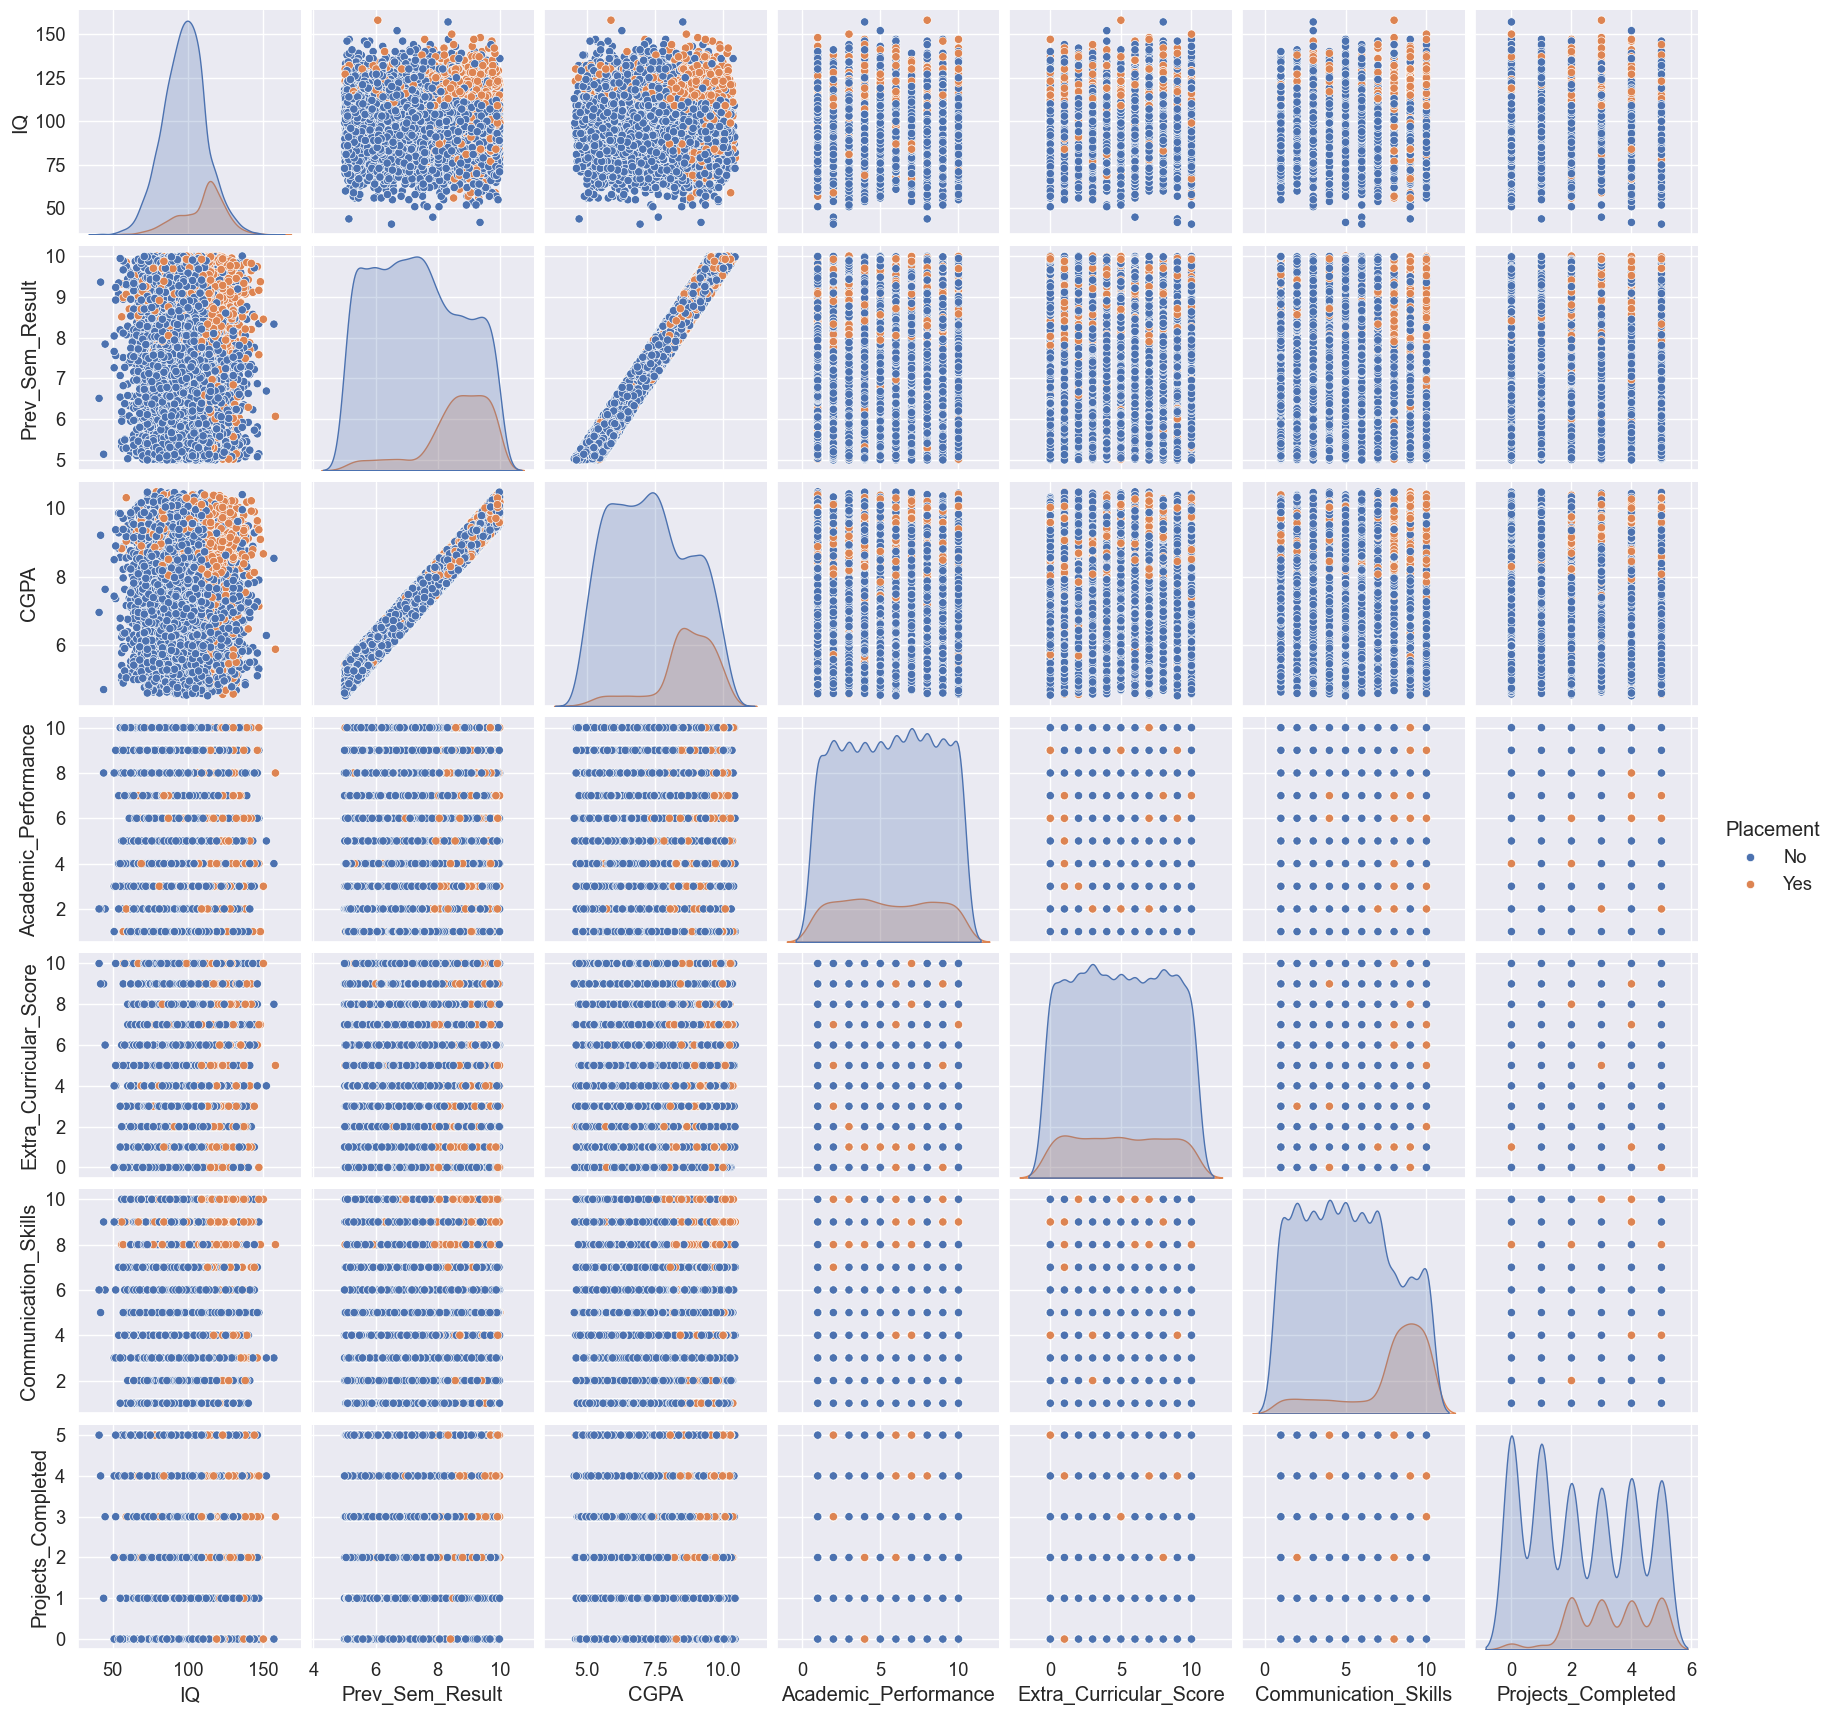

In [135]:
sns.pairplot(df, hue='Placement')


Text(0.5, 1.0, 'CGPA vs Communication Skills by Placement')

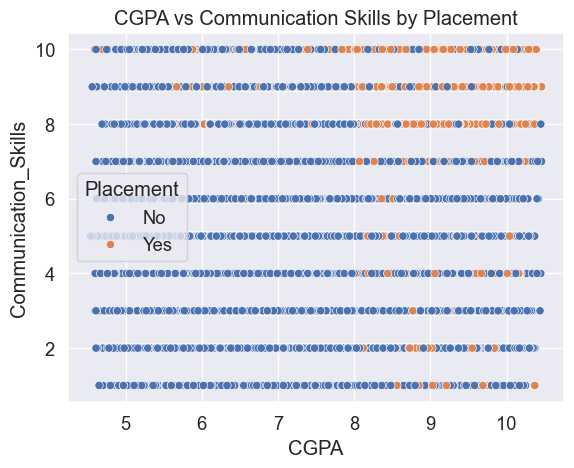

In [136]:
sns.scatterplot(x='CGPA', y='Communication_Skills', hue='Placement', data=df)
plt.title("CGPA vs Communication Skills by Placement")


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [138]:
df.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy dataset
df_encoded = df.copy()

# Initialize label encoder
le = LabelEncoder()

# Encode categorical columns
df_encoded['Placement'] = le.fit_transform(df_encoded['Placement'])  # Yes=1, No=0
df_encoded['Internship_Experience'] = le.fit_transform(df_encoded['Internship_Experience'])
df_encoded['College_ID'] = le.fit_transform(df_encoded['College_ID'])

# ✅ Use the ENCODED dataframe here (df_encoded), not df
X = df_encoded[['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
                'Internship_Experience', 'Extra_Curricular_Score',
                'Communication_Skills', 'Projects_Completed', 'College_ID']]

y = df_encoded['Placement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])


In [141]:
y = le.fit_transform(y)


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [143]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC()
    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")


Logistic Regression Accuracy: 0.902
Random Forest Accuracy: 1.000
Gradient Boosting Accuracy: 1.000
SVM Accuracy: 0.944


In [144]:
import pickle

# Replace 'model' with your trained model variable name
model.fit(X, y)
import pickle
with open('placement_model.pkl', 'wb') as f:
    pickle.dump(model, f)


print("✅ Model saved successfully as placement_model.pkl")


✅ Model saved successfully as placement_model.pkl


In [145]:
import pickle

# Example: after training your model
model.fit(X_train, y_train)

# Save it to a .pkl file
with open('placement_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("✅ Model saved successfully as placement_model.pkl")


✅ Model saved successfully as placement_model.pkl


In [146]:
df['College_ID']

0       CLG0030
1       CLG0061
2       CLG0036
3       CLG0055
4       CLG0004
         ...   
9995    CLG0021
9996    CLG0098
9997    CLG0066
9998    CLG0045
9999    CLG0060
Name: College_ID, Length: 10000, dtype: object